In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\sman0\OneDrive\Desktop\Data Science Projects\Project-1\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# About Dataset

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# checking for missing values and Handling

In [3]:
df.isna().sum() # No missing values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Feature selection using correlation plot

<Axes: >

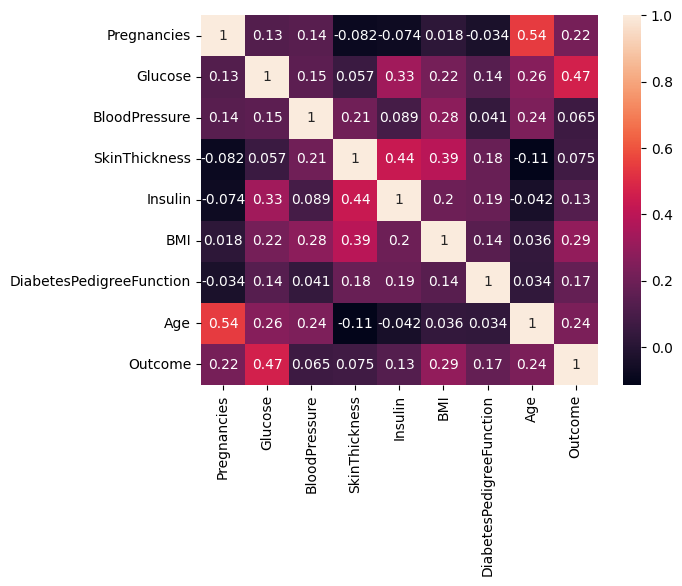

In [5]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

* Here we want to classify if the person is diabetic or not which is the outcomt in the case of this dataset.
* From the above figure we can see three possible features Age, BMI and Glucose of which Glucose is highly correlated with 0.47 value.
* So the appropriate fetaure to predict the Outcome is Glucose.
* It's a categorical data we are trying to predict so we will use LogisticRegression.

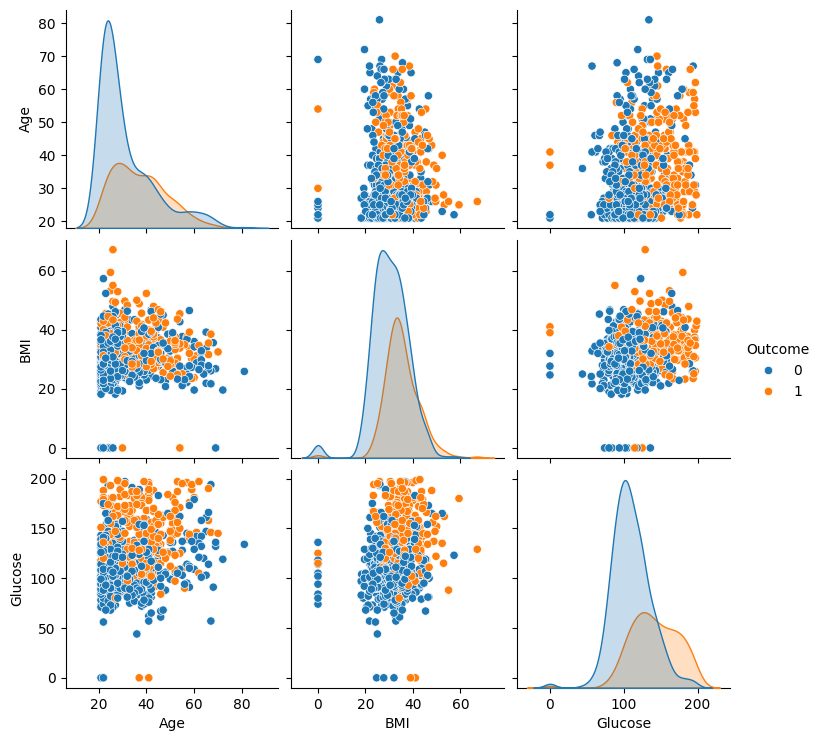

In [6]:
sns.pairplot(df[['Age', 'BMI', 'Glucose', 'Outcome']], hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Age'>

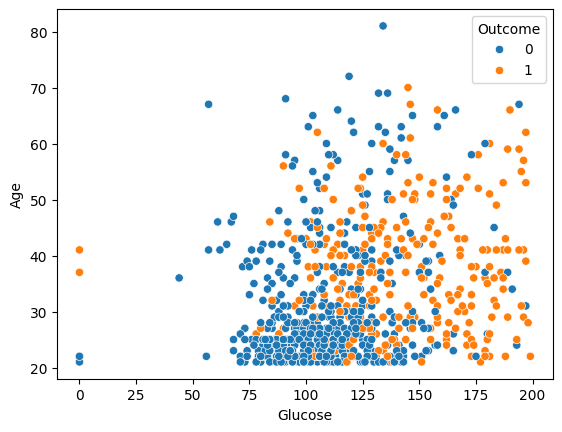

In [7]:
sns.scatterplot(x=df['Glucose'],y=df['Age'],hue=df['Outcome'])# seems difficult to classify

<Axes: xlabel='Glucose', ylabel='BMI'>

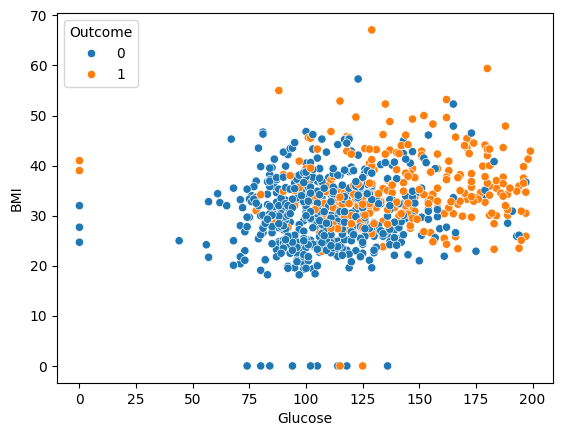

In [8]:
sns.scatterplot(x=df['Glucose'],y=df['BMI'],hue=df['Outcome']) # seems difficult to classify with more outliers aswell.

In [9]:
X = df.loc[:,['Glucose']]
y= df.Outcome

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Using logistic Regression for pipeline

In [11]:
model = Pipeline([('prep', StandardScaler()),('logr', LogisticRegression())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

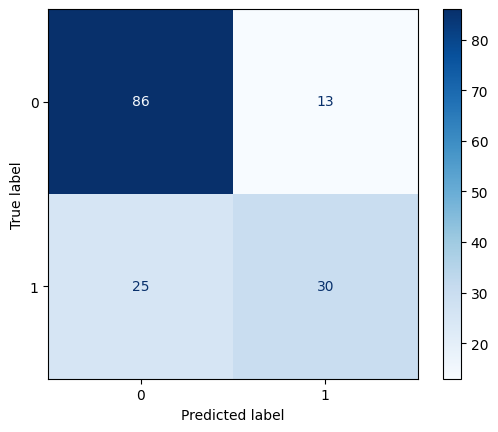

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test,y_test,cmap ="Blues")

In [13]:
accuracy = model.score(X_test,y_test)
accuracy

0.7532467532467533

In [14]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [15]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [16]:
precision_score(y_true=y_test, y_pred=y_pred)

0.6976744186046512

In [17]:
recall_score(y_true=y_test, y_pred=y_pred)

0.5454545454545454

In [18]:
f1_score(y_true=y_test, y_pred=y_pred)

0.6122448979591837

# Using SVM for pipeline

In [19]:
from sklearn.svm import SVC

In [20]:
X = df.loc[:,['Glucose']]
y= df.Outcome

In [21]:
model = Pipeline([('prep', StandardScaler()),('svm',SVC())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

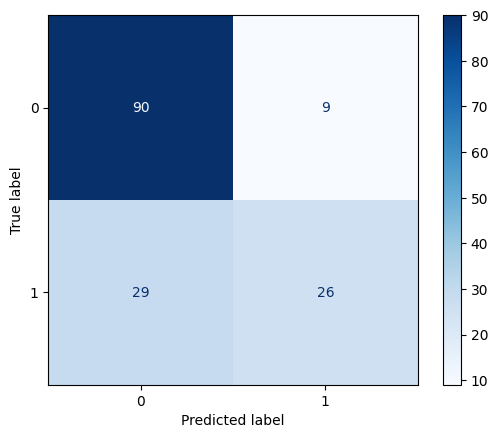

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test,y_test,cmap ="Blues")

In [23]:
accuracy = model.score(X_test,y_test)
accuracy

0.7532467532467533

In [24]:
precision_score(y_true=y_test, y_pred=y_pred)

0.7428571428571429

In [25]:
recall_score(y_true=y_test, y_pred=y_pred)

0.4727272727272727

In [26]:
f1_score(y_true=y_test, y_pred=y_pred)

0.5777777777777778

* In logistice regression we had 61% f1-score on scaled data However in svm we achieve 57% accuray on scaling in the same data. Therefore for this dataset LogisticRegression is a better algorithm.